# AIR QUALITY PREDICTION

Problem Statement:
To check the quality of air using ‘Air Quality Chemical Multisensor Device’ by finding the R^2 score or coefficient of regression using different regression models and the best model is selected to evaluate the Air Quality.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PRE-PROCESSING

In [2]:
# READ THE DATA
AQ = pd.read_excel("AirQuality.xlsx")

In [3]:
# DISPLAY THE DATA
AQ.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [4]:
#CHECKING SHAPE OF DATA
AQ.shape

(9357, 15)

In [5]:
#INFORMATION OF DATA
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
#CHECKING FOR NULL VALUES
AQ.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [7]:
#SETTING DATE AS AN INDEX
AQ.set_index("Date", inplace=True) 
AQ.index = pd.to_datetime(AQ.index)
type(AQ.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
#CONVERTING HH:MM:SS INTO HH FORMAT
AQ['Time'] = pd.to_datetime(AQ['Time'],format = '%H:%M:%S').dt.hour 
AQ.head(3)

Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                        
2004-03-10    18     2.6      1360.00       150  11.881723        1045.50   
2004-03-10    19     2.0      1292.25       112   9.397165         954.75   
2004-03-10    20     2.2      1402.00        88   8.997817         939.25   

            NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
Date                                                                          
2004-03-10    166.0       1056.25    113.0       1692.00      1267.50  13.6   
2004-03-10    103.0       1173.75     92.0       1558.75       972.25  13.3   
2004-03-10    131.0       1140.00    114.0       1554.50      1074.00  11.9   

                   RH        AH  
Date                             
2004-03-10  48.875001  0.757754  
2004-03-10  47.700000  0.725487  
2004-03-10  53.975000  0.750239

In [9]:
#DATA DESCRIPTION
AQ.describe()

Time       CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean     11.498557   -34.207524  1048.869652  -159.090093     1.865576   
std       6.923182    77.657170   329.817015   139.789093    41.380154   
min       0.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%       5.000000     0.600000   921.000000  -200.000000     4.004958   
50%      11.000000     1.500000  1052.500000  -200.000000     7.886653   
75%      18.000000     2.600000  1221.250000  -200.000000    13.636091   
max      23.000000    11.900000  2039.750000  1189.000000    63.741476   

       PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count    9357.000000  9357.000000   9357.000000  9357.000000   9357.000000   
mean      894.475963   168.604200    794.872333    58.135898   1391.363266   
std       342.315902   257.424561    321.977031   126.931428    467.192382   
min      -200.000000  -200.000000   -200.000000  -200.000000   -200.000000   
25%       711.000000    50.000000    637.000000    53.000000   1184.750000   
50%       894.500000   141.000000    794.250000    96.000000   1445.500000   
75%      1104.750000   284.200000    960.250000   133.000000   1662.000000   
max      2214.000000  1479.000000   2682.750000   339.700000   2775.000000   

       PT08.S5(O3)            T           RH           AH  
count  9357.000000  9357.000000  9357.000000  9357.000000  
mean    974.951534     9.776600    39.483611    -6.837604  
std     456.922728    43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  -200.000000  
25%     699.750000    10.950000    34.050000     0.692275  
50%     942.000000    17.200000    48.550000     0.976823  
75%    1255.250000    24.075000    61.875000     1.296223  
max    2522.750000    44.600000    88.725000     2.231036

In [10]:
#COUNT OF -200 VALUE 
AQ[AQ['CO(GT)']==-200].count()

Time             1683
CO(GT)           1683
PT08.S1(CO)      1683
NMHC(GT)         1683
C6H6(GT)         1683
PT08.S2(NMHC)    1683
NOx(GT)          1683
PT08.S3(NOx)     1683
NO2(GT)          1683
PT08.S4(NO2)     1683
PT08.S5(O3)      1683
T                1683
RH               1683
AH               1683
dtype: int64

In [11]:
#REPLACING THE NEGATIVE VALUES.
AQ.replace(to_replace= -200, value= np.NaN, inplace= True)

In [12]:
#CHECKING NULL VALUES.
AQ.isnull().any()

Time             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [13]:
AQ.isnull().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

# REMOVING NEGATIVE AND NULL VALUES

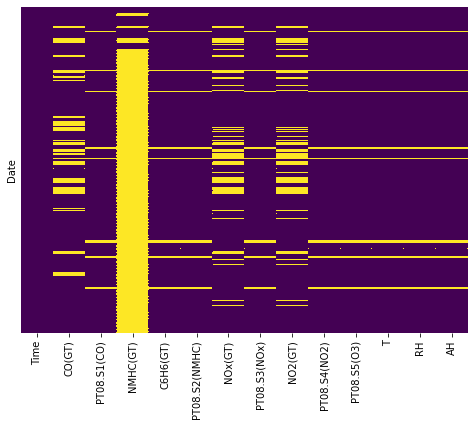

In [14]:
#YELLOW COLOR IN A PLOT SHOWS THE NULL VALUE
plt.figure(figsize=(8,6))
sns.heatmap(AQ.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:
AQ.shape

(9357, 14)

In [16]:
#REPLACING NULL VALUES WITH MEDIAN
AQ.fillna(AQ.median(), inplace=True)

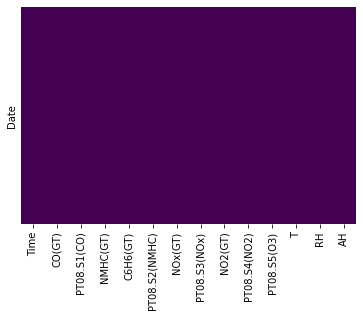

In [17]:
sns.heatmap(AQ.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [18]:
# GENERATING CORRELATION MATRIX
corr =  AQ.corr()

# PRINT THE CORRELATION MATRIX
corr

Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Time           1.000000  0.329461     0.320457  0.098702  0.335804   
CO(GT)         0.329461  1.000000     0.776959  0.291053  0.809010   
PT08.S1(CO)    0.320457  0.776959     1.000000  0.306131  0.883905   
NMHC(GT)       0.098702  0.291053     0.306131  1.000000  0.270448   
C6H6(GT)       0.335804  0.809010     0.883905  0.270448  1.000000   
PT08.S2(NMHC)  0.380565  0.795978     0.892996  0.268062  0.981633   
NOx(GT)        0.213536  0.780505     0.622606  0.048885  0.616363   
PT08.S3(NOx)  -0.317044 -0.619329    -0.770514 -0.190763 -0.733513   
NO2(GT)        0.331580  0.656163     0.563595  0.121067  0.533687   
PT08.S4(NO2)   0.216618  0.548470     0.682361  0.257690  0.764612   
PT08.S5(O3)    0.239377  0.763531     0.899419  0.229193  0.865758   
T              0.202012  0.005966     0.049020  0.030201  0.199257   
RH            -0.289528  0.041100     0.114421 -0.046866 -0.061747   
AH            -0.018431  0.022863     0.135726 -0.012151  0.168411   

               PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  \
Time                0.380565  0.213536     -0.317044  0.331580      0.216618   
CO(GT)              0.795978  0.780505     -0.619329  0.656163      0.548470   
PT08.S1(CO)         0.892996  0.622606     -0.770514  0.563595      0.682361   
NMHC(GT)            0.268062  0.048885     -0.190763  0.121067      0.257690   
C6H6(GT)            0.981633  0.616363     -0.733513  0.533687      0.764612   
PT08.S2(NMHC)       1.000000  0.606237     -0.795768  0.562180      0.776953   
NOx(GT)             0.606237  1.000000     -0.572460  0.760738      0.200840   
PT08.S3(NOx)       -0.795768 -0.572460      1.000000 -0.574249     -0.538401   
NO2(GT)             0.562180  0.760738     -0.574249  1.000000      0.140267   
PT08.S4(NO2)        0.776953  0.200840     -0.538401  0.140267      1.000000   
PT08.S5(O3)         0.880645  0.694866     -0.795316  0.630555      0.590764   
T                   0.241533 -0.245858     -0.144791 -0.169315      0.561236   
RH                 -0.090409  0.183844     -0.056798 -0.082253     -0.032174   
AH                  0.187167 -0.148301     -0.231595 -0.297994      0.629515   

               PT08.S5(O3)         T        RH        AH  
Time              0.239377  0.202012 -0.289528 -0.018431  
CO(GT)            0.763531  0.005966  0.041100  0.022863  
PT08.S1(CO)       0.899419  0.049020  0.114421  0.135726  
NMHC(GT)          0.229193  0.030201 -0.046866 -0.012151  
C6H6(GT)          0.865758  0.199257 -0.061747  0.168411  
PT08.S2(NMHC)     0.880645  0.241533 -0.090409  0.187167  
NOx(GT)           0.694866 -0.245858  0.183844 -0.148301  
PT08.S3(NOx)     -0.795316 -0.144791 -0.056798 -0.231595  
NO2(GT)           0.630555 -0.169315 -0.082253 -0.297994  
PT08.S4(NO2)      0.590764  0.561236 -0.032174  0.629515  
PT08.S5(O3)       1.000000 -0.026805  0.124789  0.071135  
T                -0.026805  1.000000 -0.578564  0.656534  
RH                0.124789 -0.578564  1.000000  0.167898  
AH                0.071135  0.656534  0.167898  1.000000

# CORRELATION MATRIX PLOT

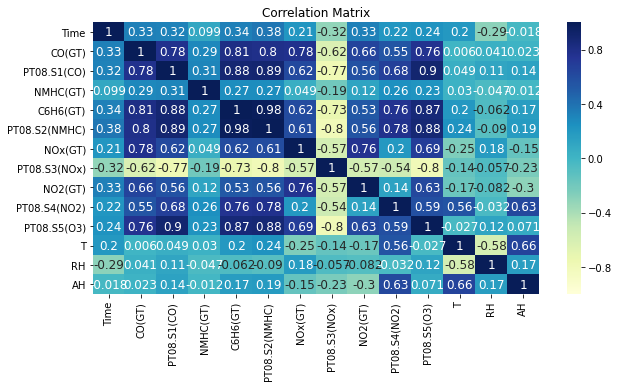

In [19]:
plt.figure(figsize=(10, 5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

# specify name of the plot
plt.title('Correlation Matrix')
plt.show()

# DETECTING OUTLIERS.

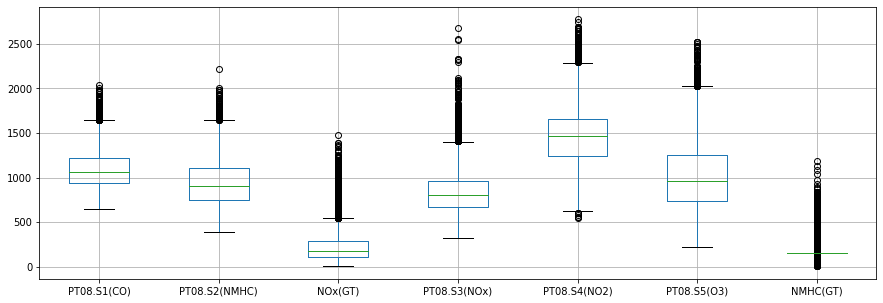

In [20]:
# CREATE A BOXPLOT FOR ALL NUMERIC FEATURES.
plt.figure(figsize=(15, 5))
AQ.boxplot(['PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','NMHC(GT)'])
plt.show()

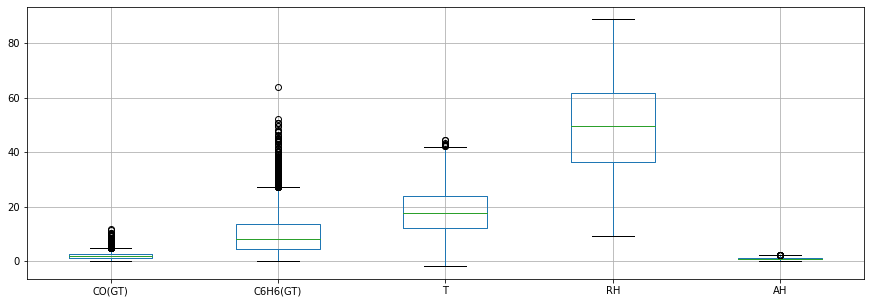

In [21]:
plt.figure(figsize=(15, 5))
AQ.boxplot(['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'])
plt.show()

# EXPLORATION

# SCATTER PLOT OF WHOLE DATA

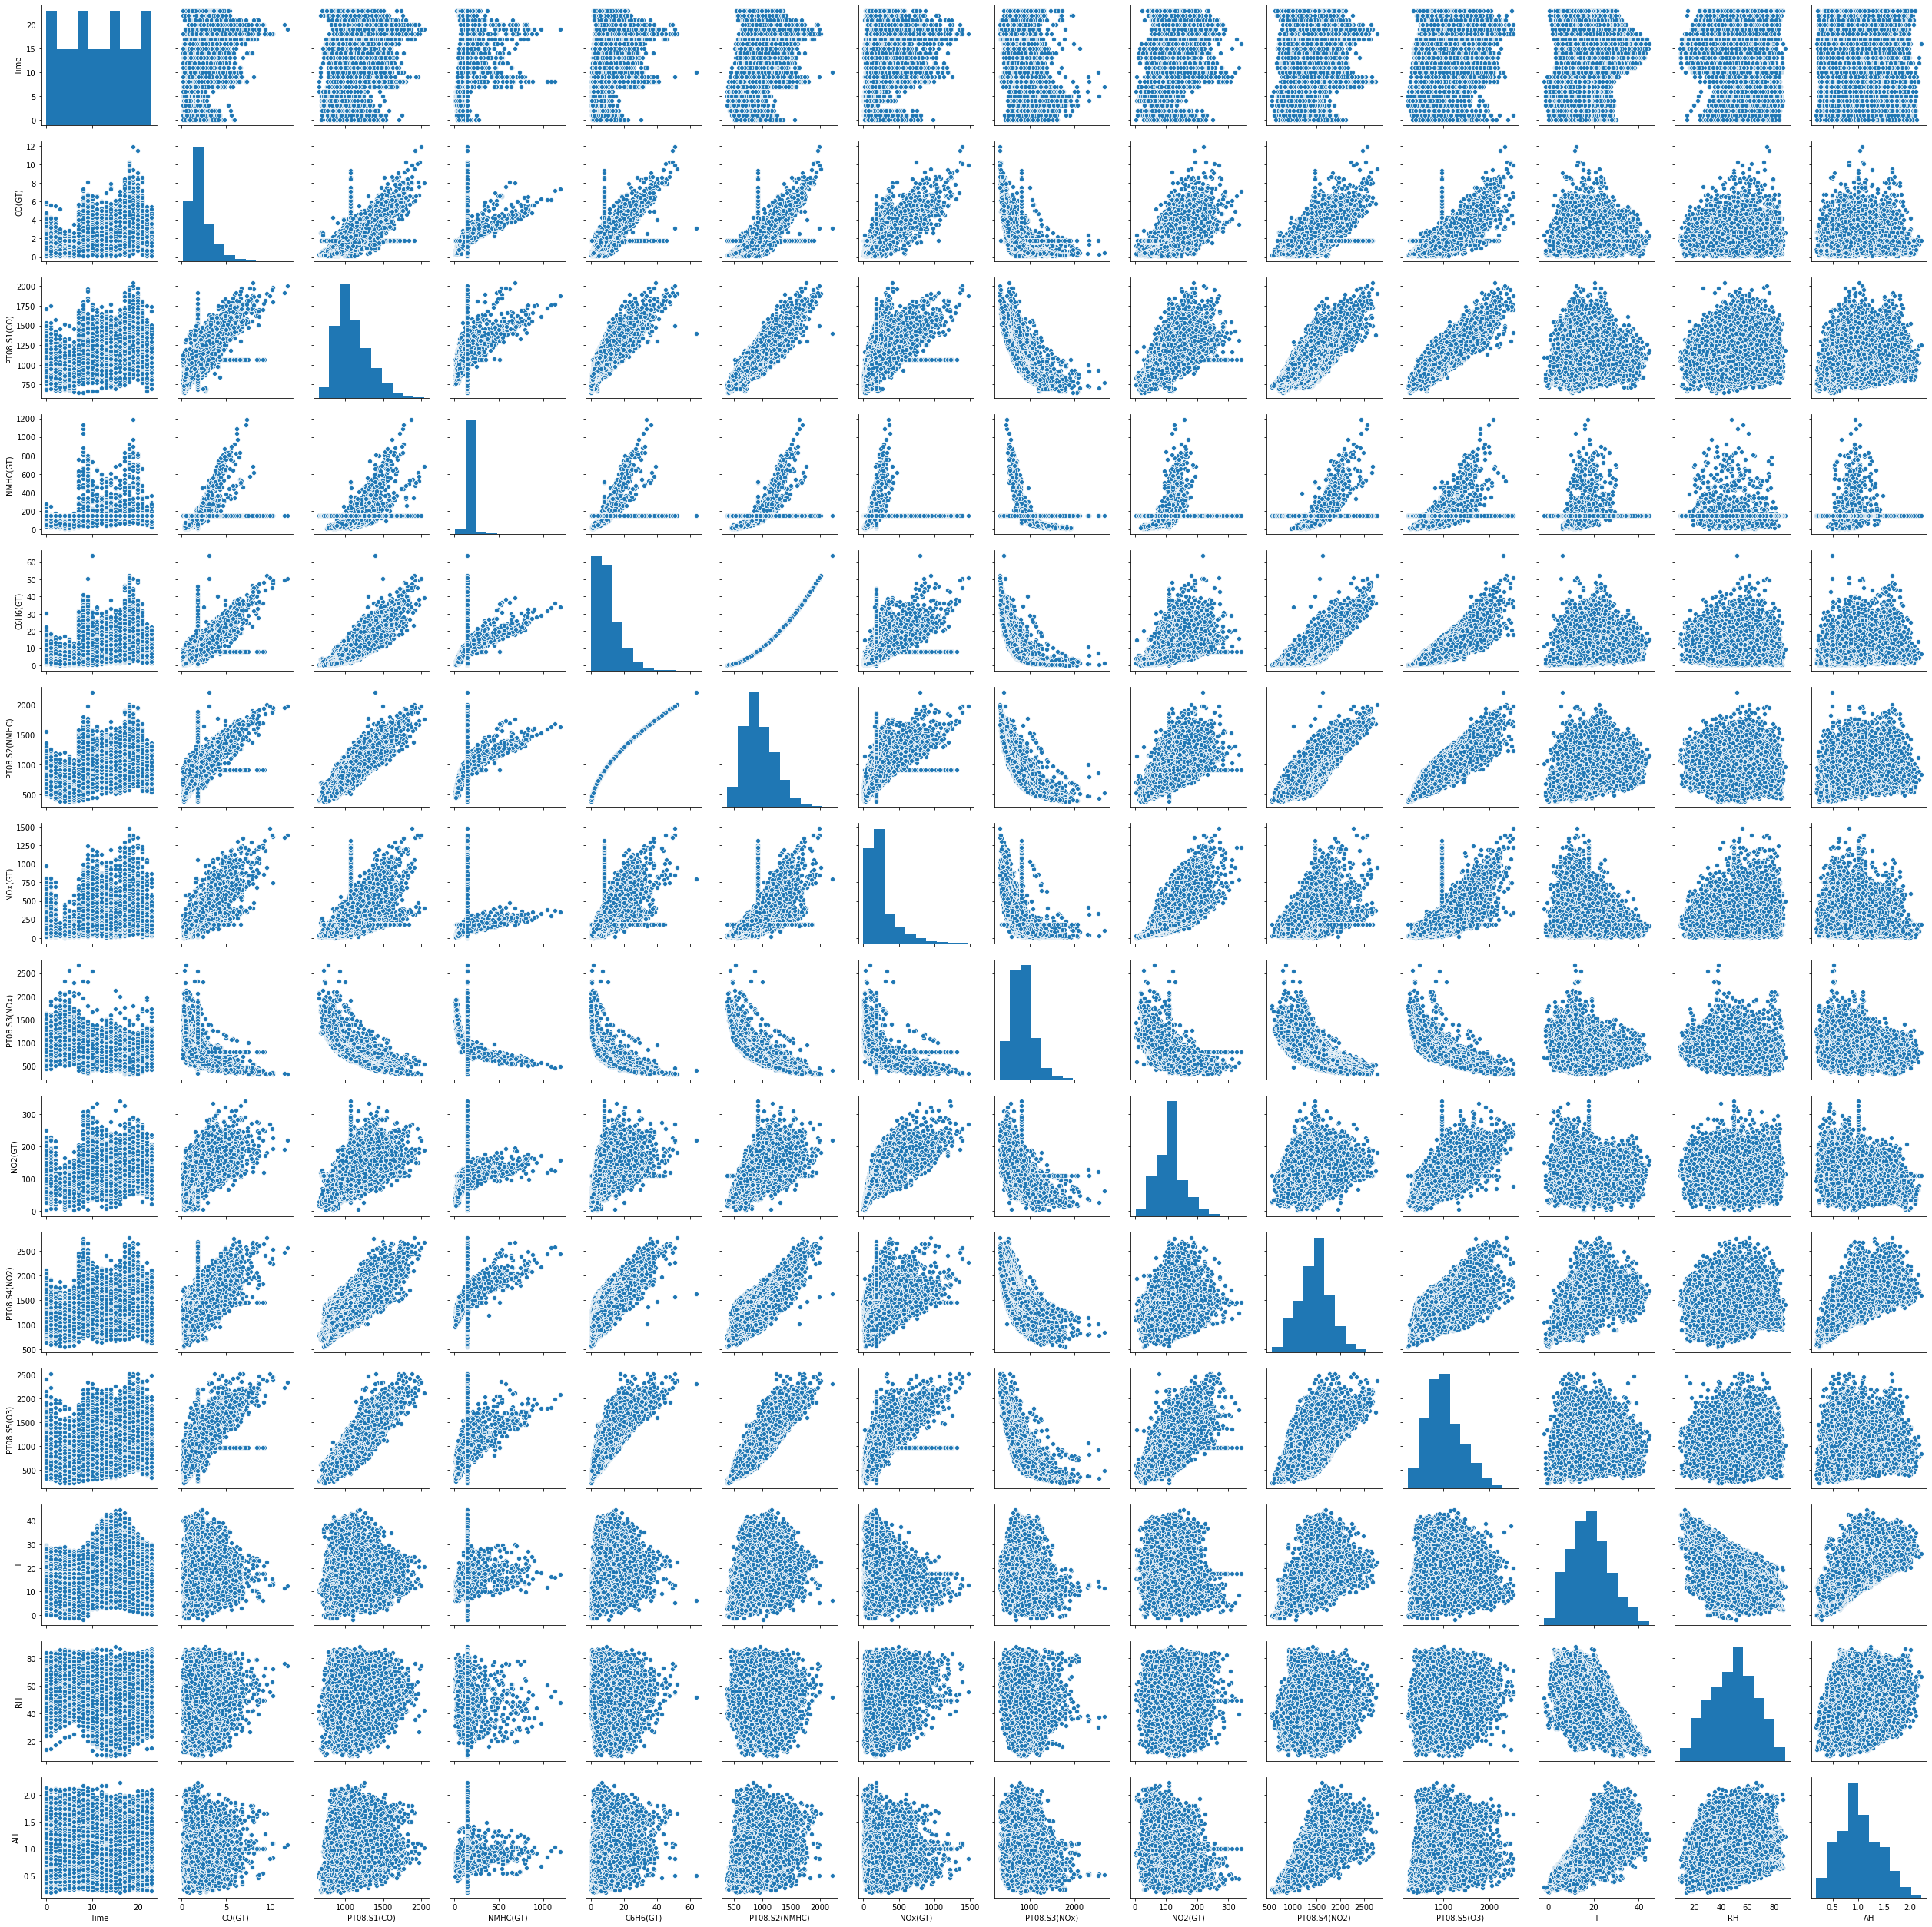

In [22]:
sns.pairplot(AQ)

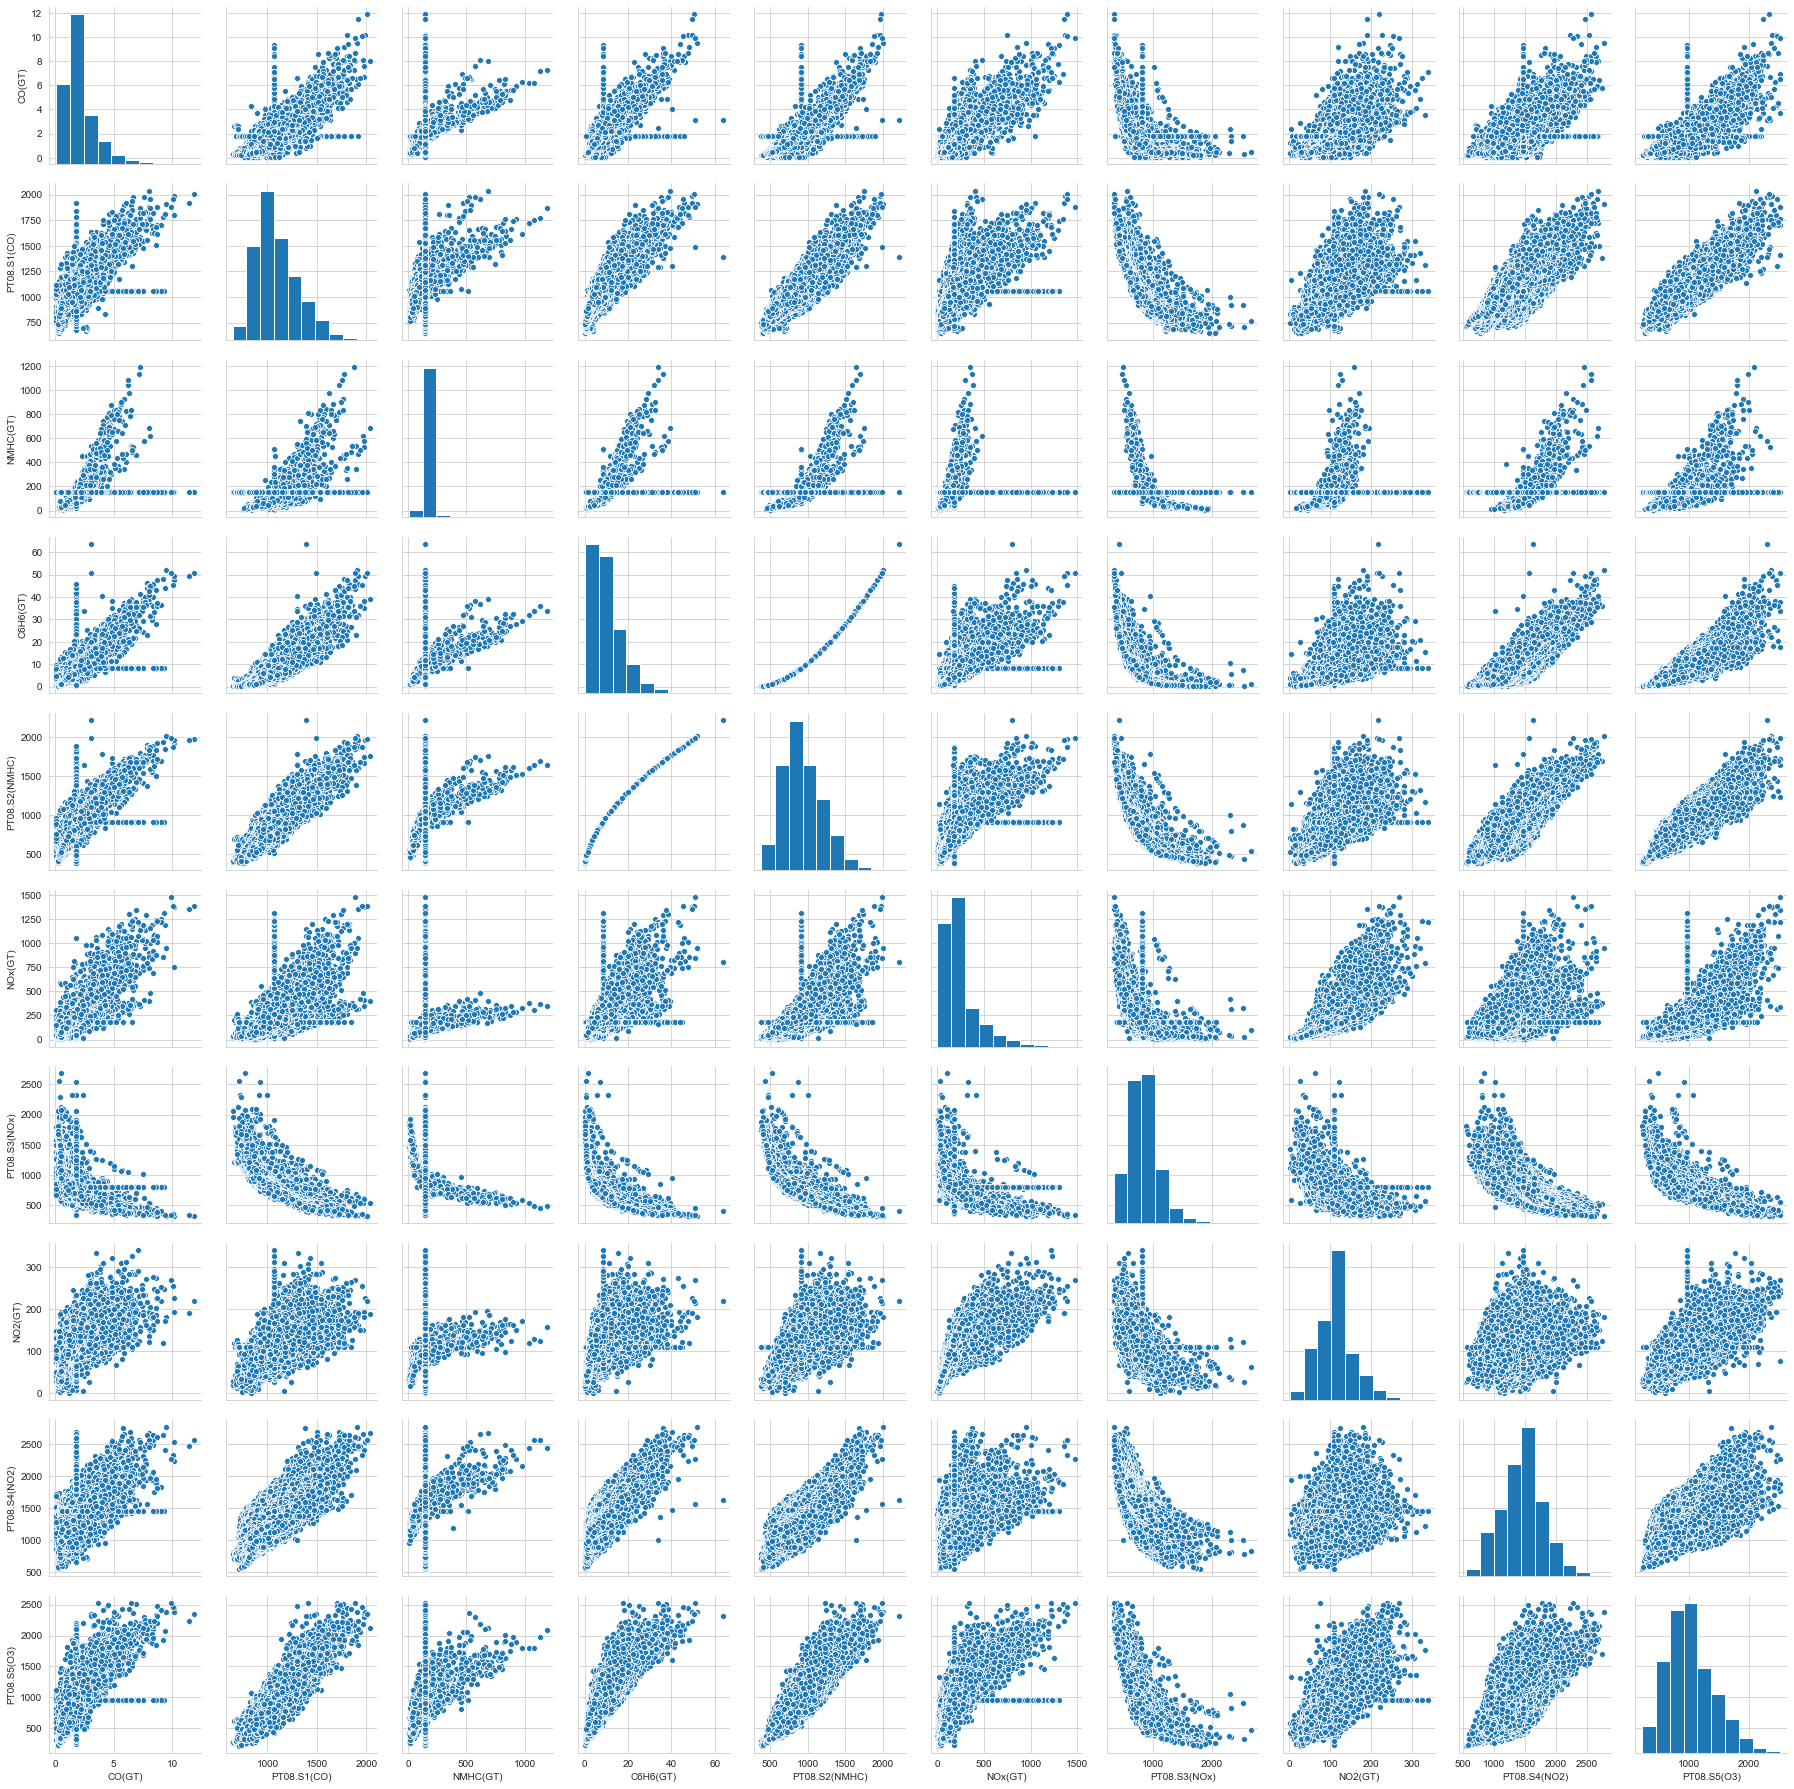

In [23]:
#SCATTER PLOT OF SELECTED FEATURES
#SELECTED FEATURES ARE--'PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','NMHC(GT)',
#'CO(GT)', 'C6H6(GT)'
sns.set_style('whitegrid')
eda_AQ = AQ.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_AQ)

# VISUALIZATION OF DATA

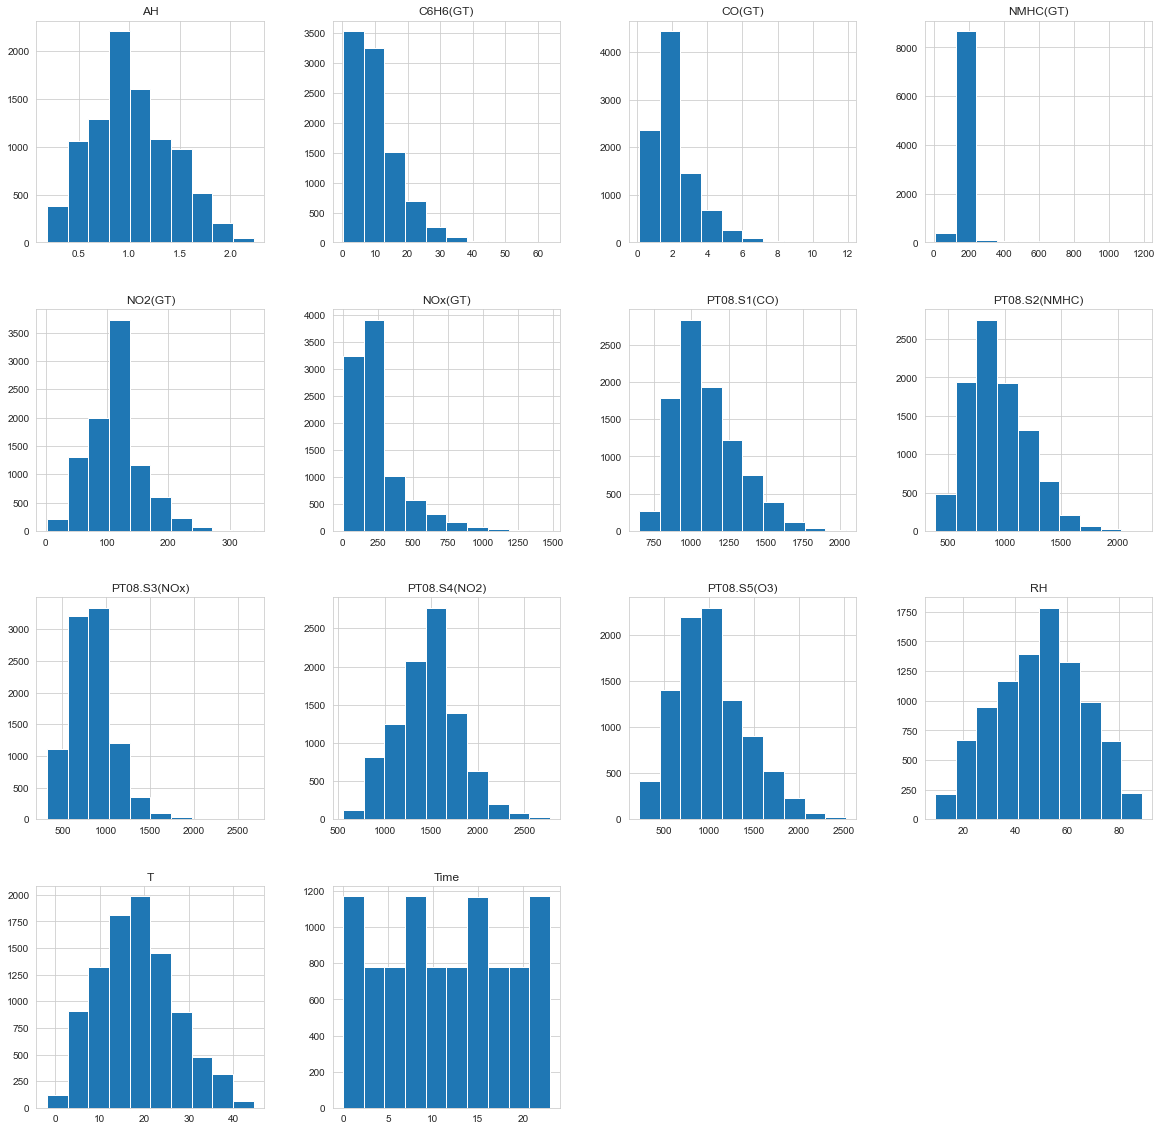

In [24]:
#HISTOGRAM OF EVERY FEATURE.
AQ.hist(figsize = (20,20))
plt.show()

CONCLUSION FROM HISTROGRAM :
From the histogram, we can observe the variability of each attribute. Also we can observe the skewness of data.

# DISTPLOT

The distplot shows the distribution of a univariate set of observations.

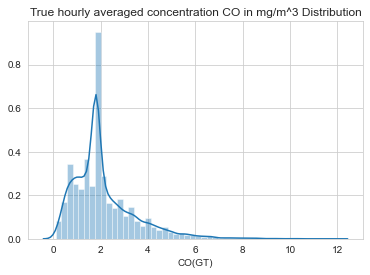

In [27]:
plt.title("True hourly averaged concentration CO in mg/m^3 Distribution")
sns.distplot(AQ['CO(GT)'])

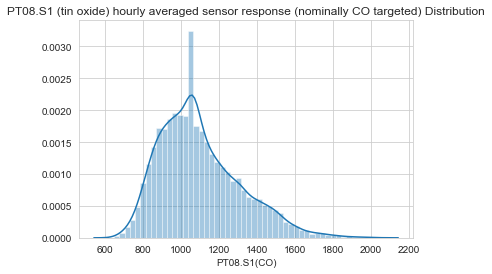

In [28]:
plt.title("PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) Distribution")
sns.distplot(AQ['PT08.S1(CO)'])

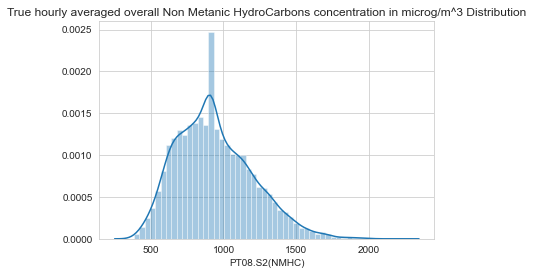

In [29]:
plt.title("True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 Distribution")
sns.distplot(AQ['PT08.S2(NMHC)'])

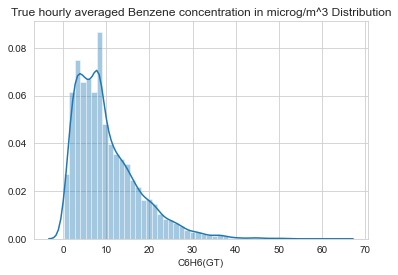

In [30]:
plt.title("True hourly averaged Benzene concentration in microg/m^3 Distribution")
sns.distplot(AQ['C6H6(GT)'])

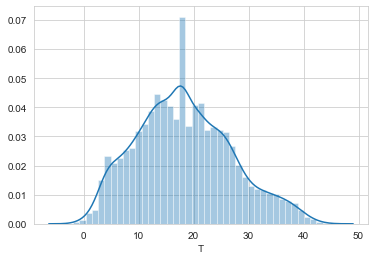

In [31]:
sns.distplot(AQ['T'])

# BARPLOT

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Level by Month')

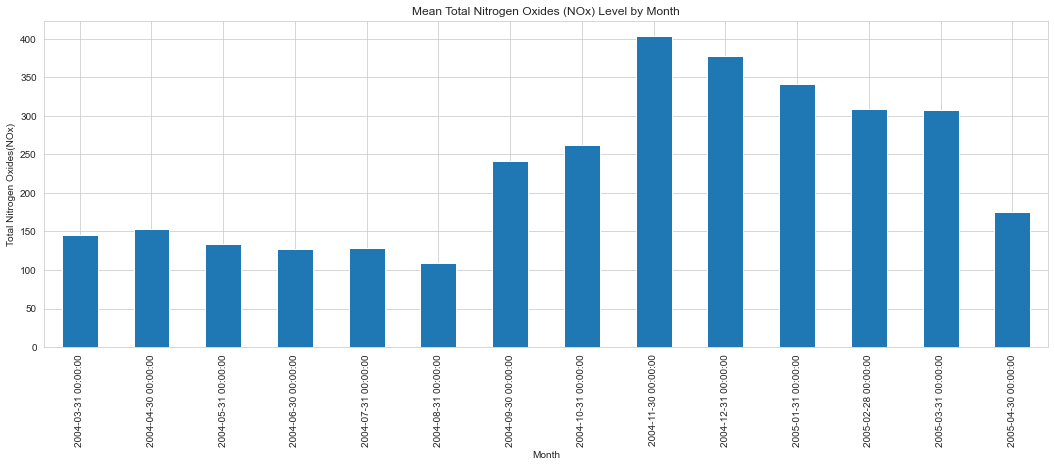

In [33]:
AQ['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitrogen Oxides(NOx)')   
plt.title("Mean Total Nitrogen Oxides (NOx) Level by Month")

CONCLUSION FROM BARPLOT -
We can see that initially, the Nitric Oxide levels are low but as the year pass, the Nitric Oxide level is increased.

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

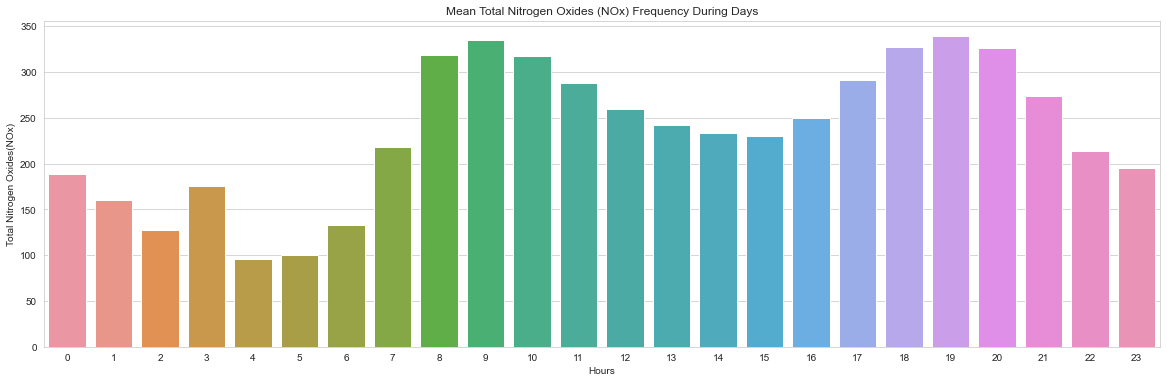

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=AQ, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides(NOx)')
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days") 

# SCATTERPLOT

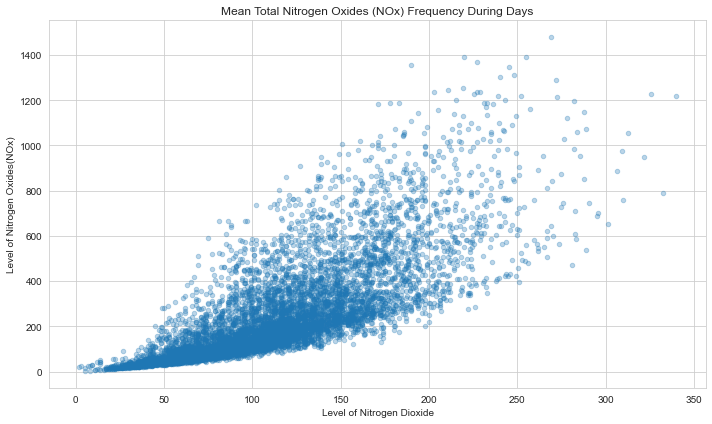

In [36]:
AQ.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides(NOx)')
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

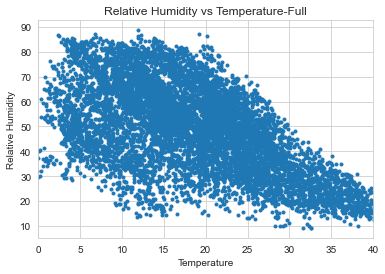

In [37]:
plt.xlabel("Temperature")
plt.ylabel('Relative Humidity')
plt.xlim(0,40)
plt.title("Relative Humidity vs Temperature-Full")
plt.scatter(AQ['T'],AQ["RH"],marker=".")

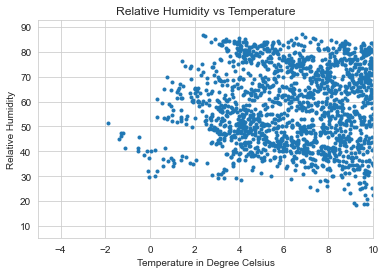

In [38]:
plt.xlabel("Temperature in Degree Celsius")
plt.ylabel('Relative Humidity')
plt.xlim(-5,10) #Get or set the x limits of the current axes.
plt.title("Relative Humidity vs Temperature")
plt.scatter(AQ['T'],AQ["RH"],marker=".")

# PREDICTION

In [39]:
#IN THE DATASET,TAKING C6H6(GT) AS TARGET FEATURE
#BY OBSERVING THE TARGET VALUES WE CAN CONCLUDE THAT, IT IS OF TYPE -- NUMERICAL(REGRESSION)
#SO NEED TO USE REGRESSION ALGORITHMS 

In [40]:
#SPLITING THE DATASET INTO TRAIN AND TEST

In [41]:
x = AQ.drop('C6H6(GT)',axis=1)
y = AQ['C6H6(GT)']

In [42]:
x

Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  \
Date                                                                      
2004-03-10    18     2.6      1360.00     150.0        1045.50    166.0   
2004-03-10    19     2.0      1292.25     112.0         954.75    103.0   
2004-03-10    20     2.2      1402.00      88.0         939.25    131.0   
2004-03-10    21     2.2      1375.50      80.0         948.25    172.0   
2004-03-10    22     1.6      1272.25      51.0         835.50    131.0   
...          ...     ...          ...       ...            ...      ...   
2005-04-04    10     3.1      1314.25     150.0        1101.25    471.7   
2005-04-04    11     2.4      1162.50     150.0        1027.00    353.3   
2005-04-04    12     2.4      1142.00     150.0        1062.50    293.0   
2005-04-04    13     2.1      1002.50     150.0         960.50    234.5   
2005-04-04    14     2.2      1070.75     150.0        1047.25    265.2   

            PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T  \
Date                                                                   
2004-03-10       1056.25    113.0       1692.00      1267.50  13.600   
2004-03-10       1173.75     92.0       1558.75       972.25  13.300   
2004-03-10       1140.00    114.0       1554.50      1074.00  11.900   
2004-03-10       1092.00    122.0       1583.75      1203.25  11.000   
2004-03-10       1205.00    116.0       1490.00      1110.00  11.150   
...                  ...      ...           ...          ...     ...   
2005-04-04        538.50    189.8       1374.25      1728.50  21.850   
2005-04-04        603.75    179.2       1263.50      1269.00  24.325   
2005-04-04        603.25    174.7       1240.75      1092.00  26.900   
2005-04-04        701.50    155.7       1041.00       769.75  28.325   
2005-04-04        654.00    167.7       1128.50       816.00  28.500   

                   RH        AH  
Date                             
2004-03-10  48.875001  0.757754  
2004-03-10  47.700000  0.725487  
2004-03-10  53.975000  0.750239  
2004-03-10  60.000000  0.786713  
2004-03-10  59.575001  0.788794  
...               ...       ...  
2005-04-04  29.250000  0.756824  
2005-04-04  23.725000  0.711864  
2005-04-04  18.350000  0.640649  
2005-04-04  13.550000  0.513866  
2005-04-04  13.125000  0.502804  

[9357 rows x 13 columns]

In [43]:
y

Date
2004-03-10    11.881723
2004-03-10     9.397165
2004-03-10     8.997817
2004-03-10     9.228796
2004-03-10     6.518224
                ...    
2005-04-04    13.529605
2005-04-04    11.355157
2005-04-04    12.374538
2005-04-04     9.547187
2005-04-04    11.932060
Name: C6H6(GT), Length: 9357, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=62)

# STANDARDIZATION (SCALING)


Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 
and the standard deviation is 1.

In [46]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

#  K-NEAREST NEIGHBOUR 

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). 

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [49]:
y_pred = knn.predict(x_test)
y_pred

array([ 5.9179887 , 13.60684176, 15.00314218, ...,  8.23985135,
       35.18429169, 23.23674613])

In [50]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

Actual  Predicted
Date                            
2004-03-29   6.457165   5.917989
2004-11-02  13.896181  13.606842
2004-06-08  15.718368  15.003142
2004-03-22   2.025609   2.050637
2005-03-21   9.203009   8.517091
...               ...        ...
2004-11-25   9.132252   9.017661
2004-07-14   2.884931   3.250028
2004-09-08   8.239851   8.239851
2004-11-02  37.956029  35.184292
2004-06-23  24.173145  23.236746

[1872 rows x 2 columns]

In [51]:
#VISUALISING THE RESULT

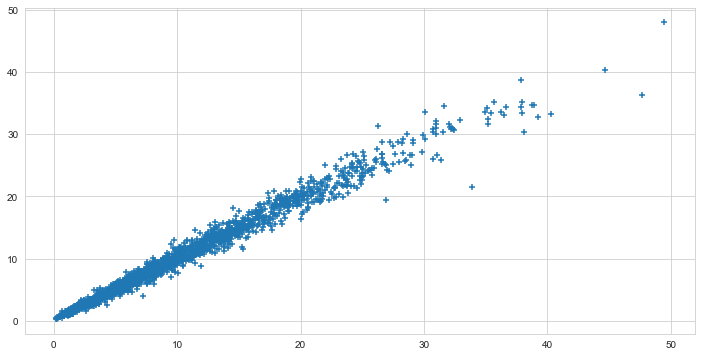

In [52]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,marker='+')


# R^2 SCORE 

R-squared is a statistical measure that represents the goodness of fit of a regression model. 
The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

In [54]:
from sklearn.metrics import r2_score
a=r2_score(y_test,y_pred)*100
a

97.90798511216062

# LINEAR REGRESSION

Linear regression finds the linear relationship between the dependent variable and one or more independent variables
using a best-fit straight line

In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred = LR.predict(x_test)

In [58]:
y_pred

array([ 7.64433658, 14.63270828, 16.0081446 , ...,  8.94817354,
       33.90924735, 22.60880903])

In [59]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

Actual  Predicted
Date                            
2004-03-29   6.457165   7.644337
2004-11-02  13.896181  14.632708
2004-06-08  15.718368  16.008145
2004-03-22   2.025609   2.198973
2005-03-21   9.203009   9.153691
...               ...        ...
2004-11-25   9.132252  10.395176
2004-07-14   2.884931   1.693581
2004-09-08   8.239851   8.948174
2004-11-02  37.956029  33.909247
2004-06-23  24.173145  22.608809

[1872 rows x 2 columns]

In [60]:
#VISUALISING THE RESULT(PLOTTING BESTFIT LINE)

(-2.5, 52.5, -4.95914316147384, 52.61710205530828)

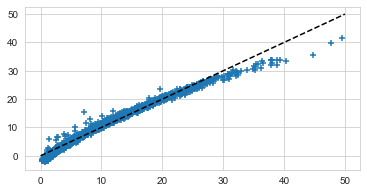

In [61]:
plt.figure(figsize=(6,3))
plt.scatter(y_test,y_pred,marker='+')
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight') 
#'tight'-- Set limits just large enough to show all data, then disable further autoscaling.
             

In [62]:
#Testing data
from sklearn.metrics import r2_score
b = r2_score(y_test,y_pred)*100
b


97.50471322984777

# DECISION TREE (REGRESSION)

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data 
in the future to produce meaningful continuous output.

In [65]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(x, y) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [66]:
y_pred=regressor.predict(x_test)
y_pred

array([ 6.45716465, 13.89618138, 15.71836823, ...,  8.23985135,
       37.95602923, 24.17314538])

In [67]:
y1_pred=regressor.predict(x_train)
y1_pred

array([13.31015889,  3.4656763 ,  0.40824186, ...,  6.68037012,
       15.67791669,  8.23985135])

In [68]:
df3 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df3

Actual  Predicted
Date                            
2004-03-29   6.457165   6.457165
2004-11-02  13.896181  13.896181
2004-06-08  15.718368  15.718368
2004-03-22   2.025609   2.025609
2005-03-21   9.203009   9.203009
...               ...        ...
2004-11-25   9.132252   9.132252
2004-07-14   2.884931   2.884931
2004-09-08   8.239851   8.239851
2004-11-02  37.956029  37.956029
2004-06-23  24.173145  24.173145

[1872 rows x 2 columns]

In [69]:
#VISUALIZATION OF RESULT

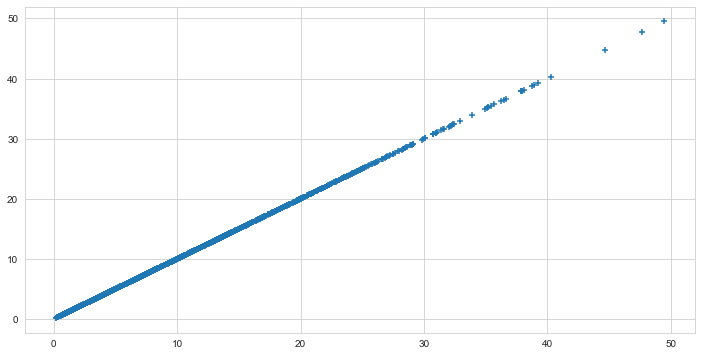

In [70]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,marker='+')

In [71]:
from sklearn.metrics import r2_score
c=r2_score(y_test,y_pred)*100
c

100.0

In [72]:
print("r2_score of K-NN Regression is : ",a)
print("r2_score of linear Regression is : ",b)
print("r2_score of Decision Tree Regression is : ",c)

r2_score of K-NN Regression is :  97.90798511216062
r2_score of linear Regression is :  97.50471322984777
r2_score of Decision Tree Regression is :  100.0


# CONCLUSION

The r2_score is higher for the Decision Tree, so we can conclude that Decision Tree Regression model is best for 
evaluating the Quality of Air for a given Air Quality Prediction dataset
